In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
df=pd.read_csv("/content/customer_support_tickets.csv")
print(df.head())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [7]:
df['Ticket Channel'].unique()
df['Ticket Channel'].value_counts()

,count
Ticket Channel,
Email,2143
Phone,2132
Social media,2121
Chat,2073


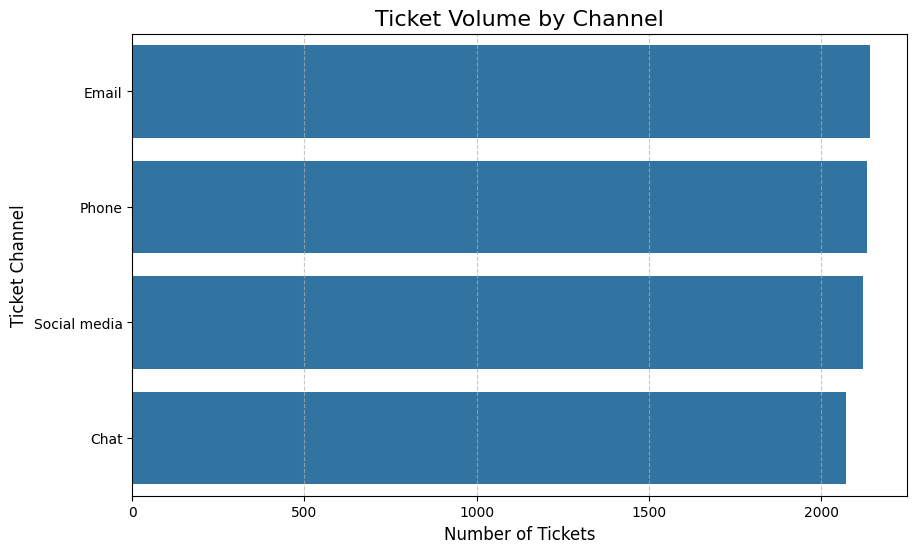

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Ticket Channel', data=df, order=df['Ticket Channel'].value_counts().index)
plt.title('Ticket Volume by Channel', fontsize=16)
plt.xlabel('Number of Tickets', fontsize=12)
plt.ylabel('Ticket Channel', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-554913553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group',data=df, palette='magma')


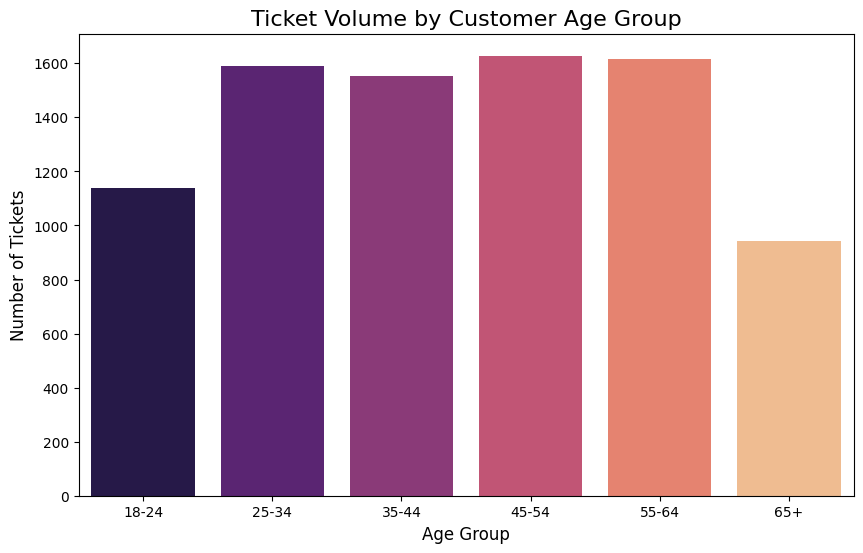

In [32]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group',data=df, palette='magma')
plt.title('Ticket Volume by Customer Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.show()


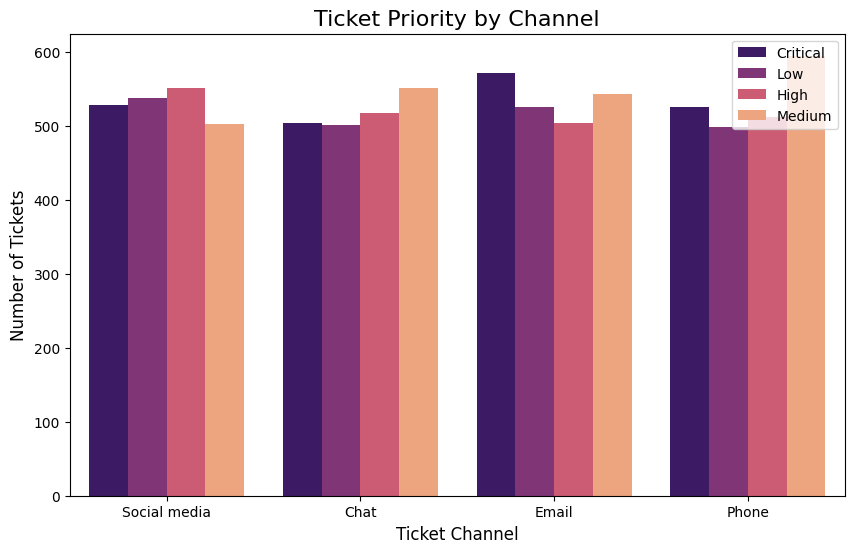

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [40]:
df.groupby('Ticket Channel')['Ticket Priority'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='Ticket Channel', hue='Ticket Priority', data=df, palette='magma')
plt.legend(loc='upper right')
plt.title('Ticket Priority by Channel', fontsize=16)
plt.xlabel('Ticket Channel', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.show()
plt

In [43]:
df.dropna(subset=['Resolution','Time to Resolution'],inplace=True)

In [48]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
       if isinstance(text, str):
           # Convert text to lowercase
           text = text.lower()
           # Remove special characters, numbers, and punctuation
           text = re.sub(r'[^a-zA-Z\s]', '', text)
           # Remove stopwords
           words = text.split()
           filtered_words = [word for word in words if word not in stop_words]
           return ' '.join(filtered_words)
           return ""
df['Cleaned_Description'] = df['Ticket Description'].apply(clean_text)
# Print the first few cleaned descriptions to verify the changes
print("\n--- First 5 Cleaned Ticket Descriptions ---")
for desc in df['Cleaned_Description'].head():
  print(desc)
# We can now save this cleaned data for future use
df.to_csv('cleaned_tickets.csv', index=False)
print("\nCleaned data has been saved to 'cleaned_tickets.csv'.")


--- First 5 Cleaned Ticket Descriptions ---
im facing problem productpurchased productpurchased turning working fine yesterday doesnt respond really im using original charger came productpurchased charging properly
im issue productpurchased please assist problem youre interested id love see happen please check feedback ive already contacted customer support multiple times issue remains unresolved
im issue productpurchased please assist note seller responsible damages arising delivery battleground game please game good condition shipped ive noticed sudden decrease battery life productpurchased used last much longer
im issue productpurchased please assist product search whats new report feedback customer service best im using original charger came productpurchased charging properly
im issue productpurchased please assist possible cannot find type text product name identify someone like mr brown ive reviewed troubleshooting steps official support website didnt resolve problem

Cleaned da

In [60]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os

def perform_nlp_analysis(file_path='cleaned_tickets.csv'):
    """
    Performs sentiment analysis and topic modeling on cleaned ticket descriptions.
    """
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_path}' was not found.")
        return

    print("Loading cleaned data...")
    df = pd.read_csv(file_path)

    # --- 1. Sentiment Analysis with TextBlob ---
    print("\n--- Performing Sentiment Analysis ---")

    # TextBlob returns a polarity score (-1 to 1) and a subjectivity score (0 to 1).
    # We will use polarity to classify sentiment.
    def get_sentiment(text):
        if isinstance(text, str):
            analysis = TextBlob(text)
            if analysis.sentiment.polarity > 0:
                return 'Positive'
            elif analysis.sentiment.polarity < 0:
                return 'Negative'
            else:
                return 'Neutral'
        return 'Neutral'

    df['Sentiment'] = df['Cleaned_Description'].apply(get_sentiment)

    # Print the distribution of sentiments to see the results
    print("Sentiment distribution:")
    print(df['Sentiment'].value_counts())

    # --- 2. Topic Modeling with Latent Dirichlet Allocation (LDA) ---
    print("\n--- Performing Topic Modeling ---")

    # TF-IDF Vectorizer to convert text to numerical features
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Description'])

    # Latent Dirichlet Allocation (LDA) to find topics
    # We'll set the number of topics to 5, but this can be tuned.
    num_topics = 5
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(tfidf_matrix)

    # Function to print the top words for each topic
    def print_top_words(model, feature_names, n_top_words):
        print(f"Top {n_top_words} words per topic:")
        for topic_idx, topic in enumerate(model.components_):
            message = "Topic #%d: " % topic_idx
            message += " ".join([feature_names[i]
                                 for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(message)

    # Print the topics to the console
    print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), n_top_words=10)

    # Assign topics to each document
    topic_assignment = lda.transform(tfidf_matrix).argmax(axis=1)
    df['Topic_ID'] = topic_assignment

    # Manually map topic IDs to meaningful names based on interpretation of top words
    topic_names_map = {
        0: 'Technical Support',
        1: 'General Troubleshooting',
        2: 'Advanced Troubleshooting',
        3: 'Error Messages',
        4: 'Feature Requests'
    }

    df['Topic_Name'] = df['Topic_ID'].map(topic_names_map)

    # Print the new topic names and their distribution
    print("\nTopic names and their distribution:")
    print(df['Topic_Name'].value_counts())

    # Save the dataframe with new sentiment and topic columns
    df.to_csv('tickets_with_analysis.csv', index=False)
    print("\nFinal data with sentiment, topic IDs, and topic names saved to 'tickets_with_analysis.csv'.")


if __name__ == "__main__":
    perform_nlp_analysis()


Loading cleaned data...

--- Performing Sentiment Analysis ---
Sentiment distribution:
Sentiment
Positive    1445
Negative     682
Neutral      642
Name: count, dtype: int64

--- Performing Topic Modeling ---
Top 10 words per topic:
Topic #0: software issue device im checked assist different recent changes havent
Topic #1: fine im facing works resolve intermittent unexpectedly acts reset problem
Topic #2: issue troubleshooting im steps specific ive mentioned manual user problem
Topic #3: issue im assist noticed screen ive message error mean says
Topic #4: option issue action perform im desired recently guide steps unable

Topic names and their distribution:
Topic_Name
Error Messages              631
Technical Support           607
Feature Requests            543
Advanced Troubleshooting    497
General Troubleshooting     491
Name: count, dtype: int64

Final data with sentiment, topic IDs, and topic names saved to 'tickets_with_analysis.csv'.
